In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [2]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

--2021-05-28 19:06:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2021-05-28 19:06:30 (201 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [3]:
train_dir = os.path.join('/tmp/h-or-s')

happy_dir, sad_dir = [os.path.join(train_dir, fn) for fn in os.listdir(train_dir)]

In [4]:
print(f'Happy shape: {len(os.listdir(happy_dir))}')
print(f'Sad shape: {len(os.listdir(sad_dir))}')

Happy shape: 40
Sad shape: 40


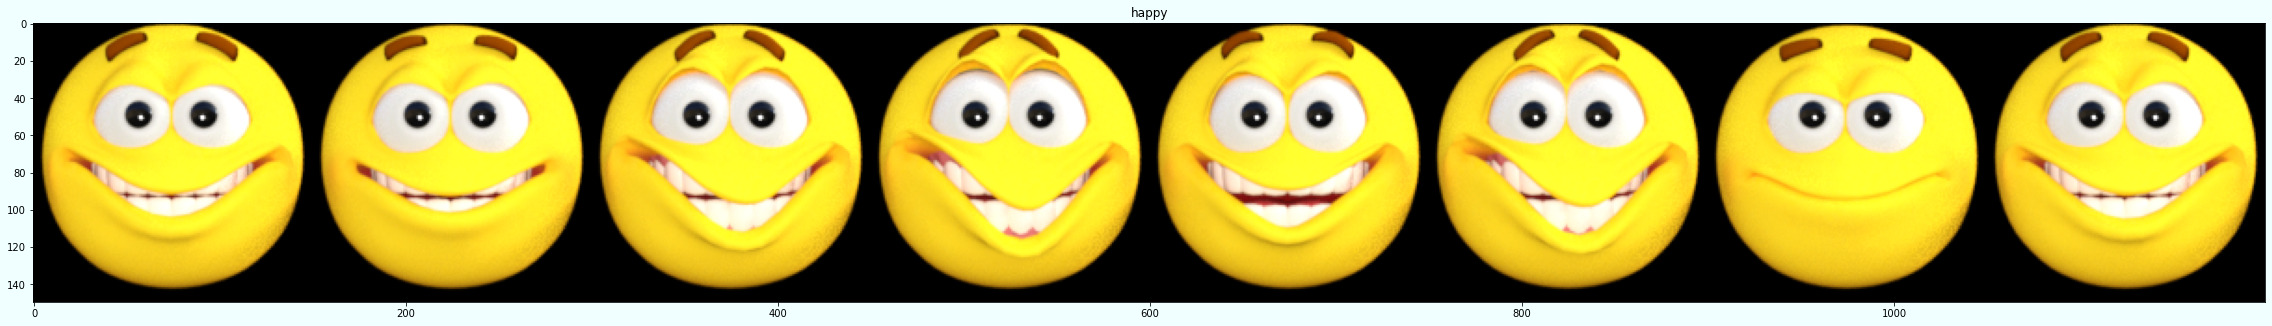

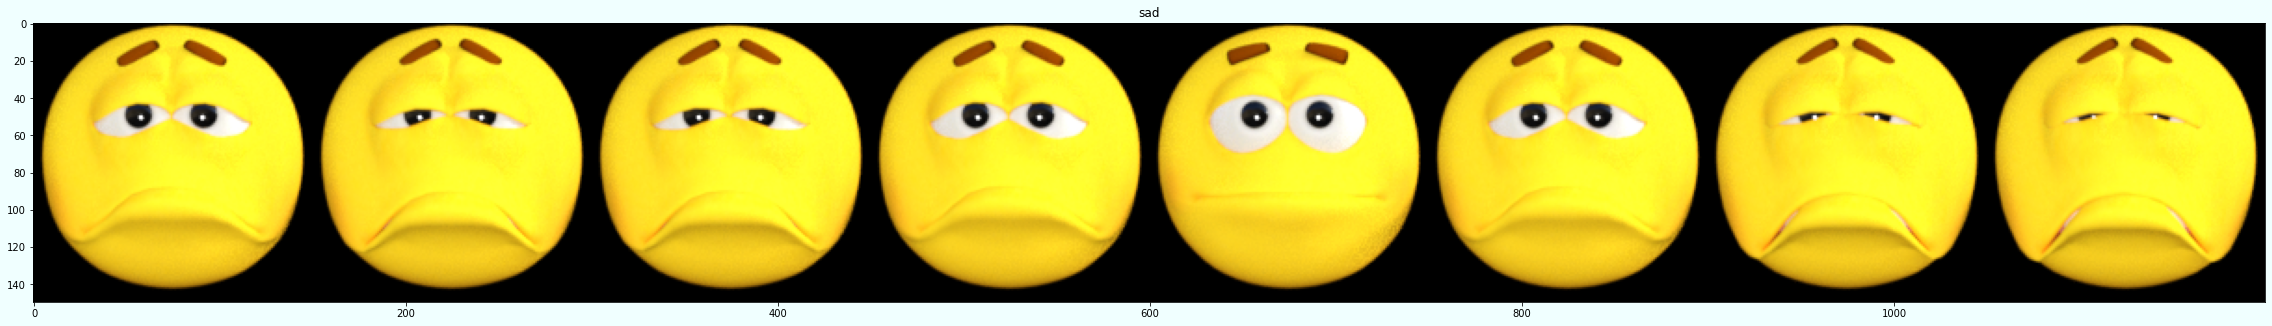

In [5]:
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
from matplotlib import image as mpimg 
import numpy as np
np.set_printoptions(250)

happy_path, sad_path = [os.path.join(happy_dir,os.listdir(happy_dir)[i]) for i in range(8)],\
                       [os.path.join(sad_dir,os.listdir(sad_dir)[i]) for i in range(8)]
n, size, scale, label = 2, 150, 40, ['happy','sad']

for i,paths in enumerate([happy_path, sad_path]):
    display = np.zeros((size,8 * size,3))
    for j,path in enumerate(paths):
        img = image.img_to_array(image.load_img(path)) / 255
        display[:, j * size:(j + 1) * size,:] = img
    plt.figure(facecolor = 'azure', figsize=(scale,scale))
    plt.imshow(display)
    plt.grid(False)
    plt.title(f'{label[i]}')
plt.show()


In [6]:
class myCallback(tf.keras.callbacks.Callback):
  # Your Code
    def __init__(self):
        super().__init__()
    def on_epoch_end(self, epcoh, logs = {}):
        if logs['accuracy'] >= 0.999:
            self.model.stop_training = True
            print("Reached 99.9% accuracy so cancelling training!")

In [7]:
from tensorflow.keras.optimizers import RMSprop
# This Code Block should Define and Compile the Model
model = tf.keras.\
        models.Sequential([
# Your Code Here
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])
print(model.summary())

model.compile(optimizer = RMSprop(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [8]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

# Your Code Here 
train_datagen = IDG(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150,150),
                    batch_size = 10,
                    class_mode = 'binary'
                  )
# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [9]:
# This code block should call model.fit and train for
# a number of epochs. 

# Your Code Here
callbacks = myCallback()
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    epochs = 15,
                    callbacks = [callbacks],
                    verbose = 1
                )
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
8/8 [==============================] - 3s 19ms/step - loss: 2.1373 - accuracy: 0.5750
Epoch 2/15
8/8 [==============================] - 0s 23ms/step - loss: 0.8313 - accuracy: 0.5875
Epoch 3/15
8/8 [==============================] - 0s 19ms/step - loss: 0.6697 - accuracy: 0.7500
Epoch 4/15
8/8 [==============================] - 0s 19ms/step - loss: 0.2903 - accuracy: 0.9250
Epoch 5/15
8/8 [==============================] - 0s 20ms/step - loss: 0.2698 - accuracy: 0.9125
Epoch 6/15
8/8 [==============================] - 0s 20ms/step - loss: 0.2294 - accuracy: 0.8875
Epoch 7/15
8/8 [==============================] - 0s 20ms/step - loss: 0.2194 - accuracy: 0.9250
Epoch 8/15
8/8 [==============================] - 0s 20ms/step - loss: 0.2324 - accuracy: 0.8375
Epoch 9/15
8/8 [==============================] - 0s 19ms/step - loss: 0.0518 - accuracy: 0.9875
Epoch 10/15
8/8 [==============================] - 0s 19ms/step - loss: 0.0273 - accuracy: 1.0000
Reached 99.9% accuracy so can

**Visualizing first 6 layers.**

---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


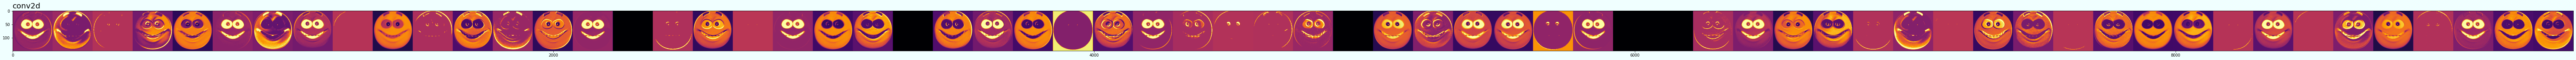

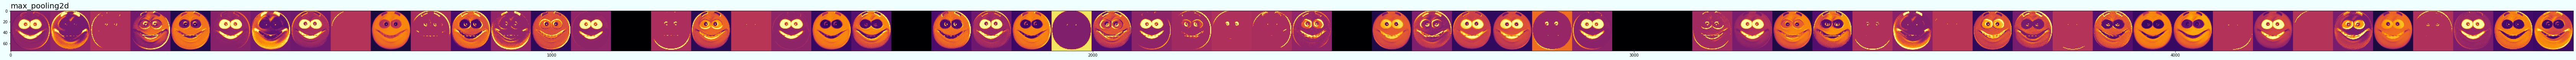

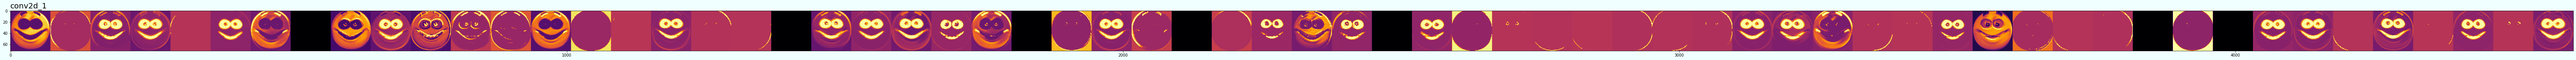

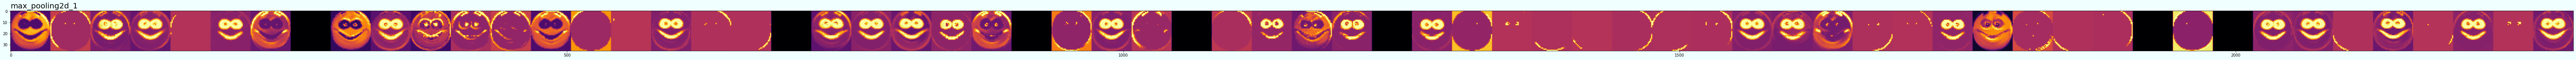

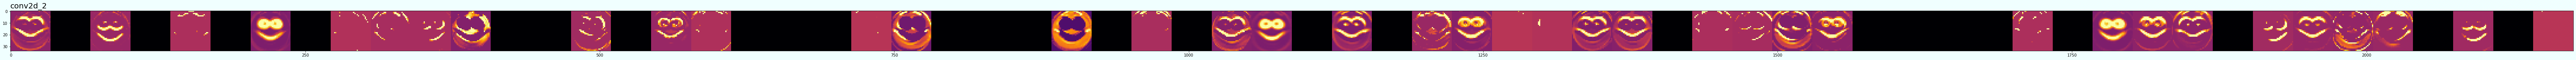

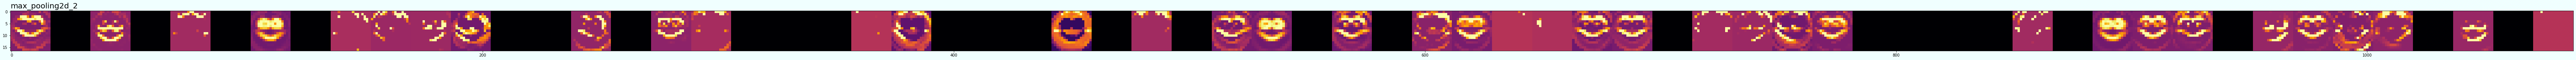

In [10]:
happy_path, sad_path = [os.path.join(happy_dir,os.listdir(happy_dir)[i]) for i in range(8)],\
                       [os.path.join(sad_dir,os.listdir(sad_dir)[i]) for i in range(8)]

n, scale, path = len(model.layers), 40, \
                    np.random.choice([os.path.join(happy_dir,fn) for fn in os.listdir(happy_dir)] + \
                                     [os.path.join(sad_dir,fn) for fn in os.listdir(sad_dir)])
                    
layers, layer_name = [layer.output for layer in model.layers], [layer.name for layer in model.layers]
activation_function = tf.keras.Model(inputs = model.input, outputs = layers)
img = image.img_to_array(image.load_img(path)) / 255
img = np.expand_dims(img, axis=0)
act_func = activation_function.predict(img)
for i,act in enumerate(act_func[:6]):
    size = len(act[0])
    display = np.zeros((size,size * 64))
    if len(act.shape) == 4:
        for j in range(64):
            img = act[0, :, :, j]
            img -= img.mean()
            img /= img.std()
            img *= 64
            img += 128
            img = np.clip(img, 0, 255).astype('uint8')
            display[:, j * size:(j + 1) * size] = img
        plt.figure(facecolor = 'azure', figsize=(scale*3,scale))
        plt.grid(False)
        plt.title(f'{layer_name[i]}', loc='left', fontsize=20)
        plt.imshow(display, cmap = 'inferno')
plt.show()